**Step by step**

1. Sélection et la division des caractéristiques

Choix des caractéristiques les plus pertinentes qui sont susceptibles d'influencer la note IMDB d'un film

2. Construction du modèle

choix des modèles de prédiction 
    
3. Entraînement et évaluation du modèle

Entraînement : Entraîner le modèle sur less données IMDB.
Évaluation : Évaluer la performance des modèles à l'aide de métriques telles que le RMSE (Root Mean Square Error)

4. Optimisation du modèle 

Choix des techniques telles que la validation croisée et Grid Search pour optimiser les hyperparamètres du modèle


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [111]:
# URL fournie
dataset_url = "https://raw.githubusercontent.com/AntoanetaStoyanova/PROJECT-IMBD/main/Datas/5000_movie_correction.csv"

# Chargement des données
df = pd.read_csv(dataset_url)
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,color_binary
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Selection de la cible

In [112]:
# Sélection des caractéristiques et de la cible
features = ['num_critic_for_reviews', 'director_fb_likes', 'cast_total_fb_likes','gross','num_user_for_reviews','budget' ,'duration', 'title_year', 'movie_fb_likes'] 
target = 'imdb_score'  


Division des données

In [113]:
# Division des données
X = df[features]
y =df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Normalisation des caractéristiques

In [114]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Evaluation des modèles

In [115]:
# Entraînement et évaluation du modèle de Régression Linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Calcul des métriques
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f'RMSE (Régression Linéaire): {rmse_linear}')
print(f'R² (Régression Linéaire): {r2_linear}')


RMSE (Régression Linéaire): 0.9797233264700416
R² (Régression Linéaire): 0.26620106530990784


In [116]:
# Entraînement et évaluation du modèle plus complexe, comme une Forêt Aléatoire
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RMSE (Forêt Aléatoire): {rmse_rf}')
print(f'R² (Forêt Aléatoire): {r2_rf}')

RMSE (Forêt Aléatoire): 0.8274647845277212
R² (Forêt Aléatoire): 0.4765572123595002


In [117]:
# Grid Search pour les meilleurs hyperparamètres
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(rf_model, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'RMSE (Meilleure Forêt Aléatoire): {rmse_best_rf}')
print(f'R² (Meilleure Forêt Aléatoire): {r2_best_rf}')

RMSE (Meilleure Forêt Aléatoire): 0.8222157961622437
R² (Meilleure Forêt Aléatoire): 0.48317702430708065


Choix du modele

In [118]:
# Entraînement du modele retenu
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calcul du RMSE (Root Mean Square Error) et R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE (Forêt Aléatoire): {rmse}')
print(f'R² (Forêt Aléatoire): {r2}')

RMSE (Forêt Aléatoire): 0.9797233264700416
R² (Forêt Aléatoire): 0.26620106530990784


Sauvegarde du modèle pour le déployer dans une application

In [119]:
from joblib import dump, load

# Sauvegarde du modèle dans un fichier
dump(modele, 'modeleIMDB.joblib')

# Pour charger le modèle plus tard
modele_charge = load('modeleIMDB.joblib')

Afficher les Prédictions et les Valeurs Réelles

In [120]:

# Comparer les valeurs réelles et prédites
df_predictions = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred})
print(df_predictions)


      Réel    Prédit
33     6.8  6.809226
555    7.1  6.546187
4692   7.0  5.680693
3131   3.8  5.709683
3921   5.3  6.185923
...    ...       ...
314    6.9  6.624518
4352   7.2  6.634145
1872   6.3  6.119946
627    6.2  6.435951
2813   7.7  6.969187

[955 rows x 2 columns]


Visualiser les Résultats

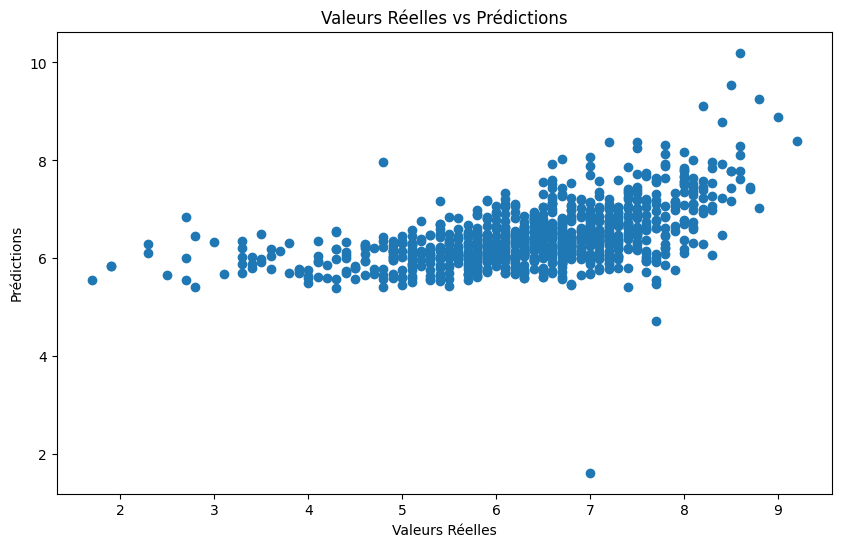

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs Prédictions')
plt.show()


Analyser les Résidus
Les résidus (la différence entre les valeurs réelles et prédites) peuvent donner des informations sur la performance du modèle.

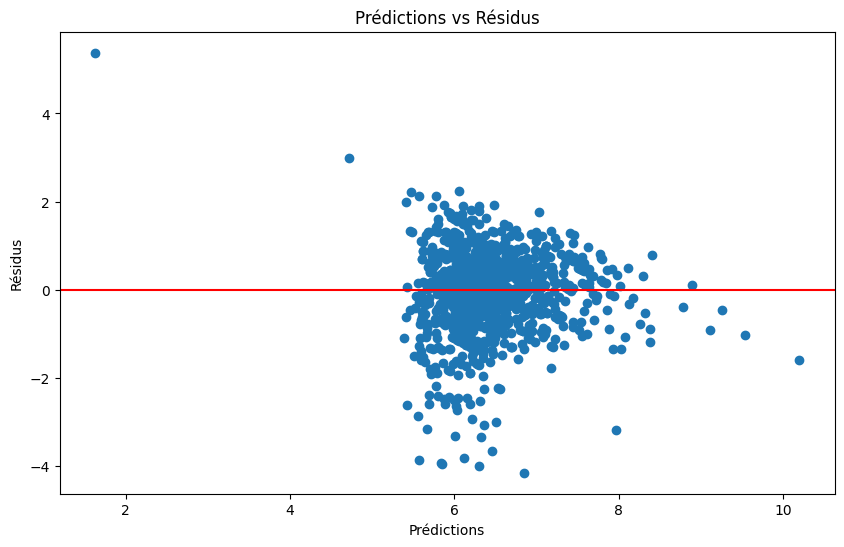

In [122]:
# Calcul des résidus
residus = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Prédictions vs Résidus')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


Évaluer la Distribution des Erreurs
Vérifiez la distribution des erreurs (résidus) pour voir si elles sont normalement distribuées, ce qui est une bonne indication que le modèle fonctionne bien

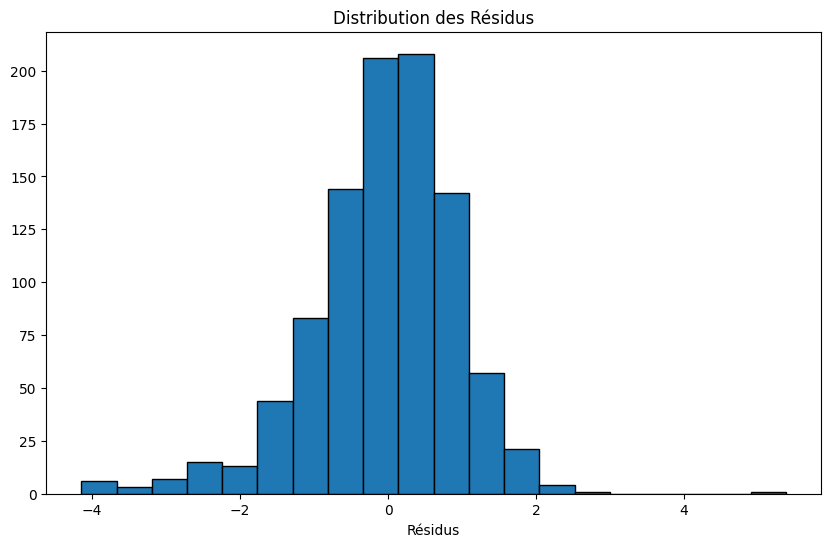

In [123]:
plt.figure(figsize=(10, 6))
plt.hist(residus, bins=20, edgecolor='black')
plt.xlabel('Résidus')
plt.title('Distribution des Résidus')
plt.show()


In [124]:
df_predictions.describe()


,Réel,Prédit
count,955.000000,955.000000
mean,6.389948,6.438303
std,1.144307,0.619536
min,1.700000,1.623249
25%,5.800000,6.041529
50%,6.500000,6.334757
75%,7.200000,6.727859
max,9.200000,10.199233
